# Car Fuel Efficiency Regression Model

This notebook builds a regression model to predict car fuel efficiency (MPG) based on vehicle characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## 1. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('car_fuel_efficiency.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (9704, 11)

First few rows:


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# Check data types and missing values
print("Dataset Info:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB

Missing values:
engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year   

## 2. Prepare Dataset with Specified Columns

In [4]:
# Select only the required columns
columns_to_use = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df_model = df[columns_to_use].copy()

print(f"Model dataset shape: {df_model.shape}")
print(f"\nMissing values in selected columns:")
print(df_model.isnull().sum())
print(f"\nPercentage of missing values:")
print(df_model.isnull().sum() / len(df_model) * 100)

Model dataset shape: (9704, 5)

Missing values in selected columns:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Percentage of missing values:
engine_displacement    0.00000
horsepower             7.29596
vehicle_weight         0.00000
model_year             0.00000
fuel_efficiency_mpg    0.00000
dtype: float64


## 3. Exploratory Data Analysis

In [5]:
# Basic statistics
print("Basic Statistics:")
df_model.describe()

Basic Statistics:


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


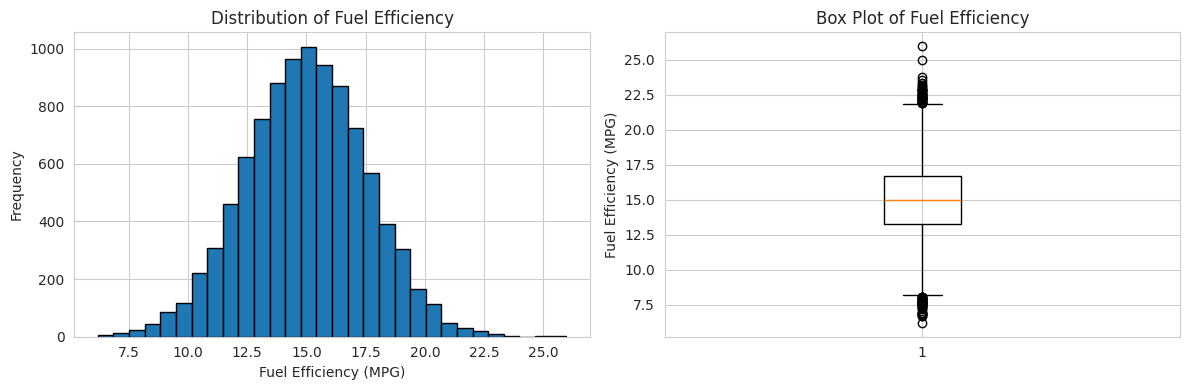

In [6]:
# Distribution of target variable
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_model['fuel_efficiency_mpg'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency')

plt.subplot(1, 2, 2)
plt.boxplot(df_model['fuel_efficiency_mpg'].dropna())
plt.ylabel('Fuel Efficiency (MPG)')
plt.title('Box Plot of Fuel Efficiency')

plt.tight_layout()
plt.show()

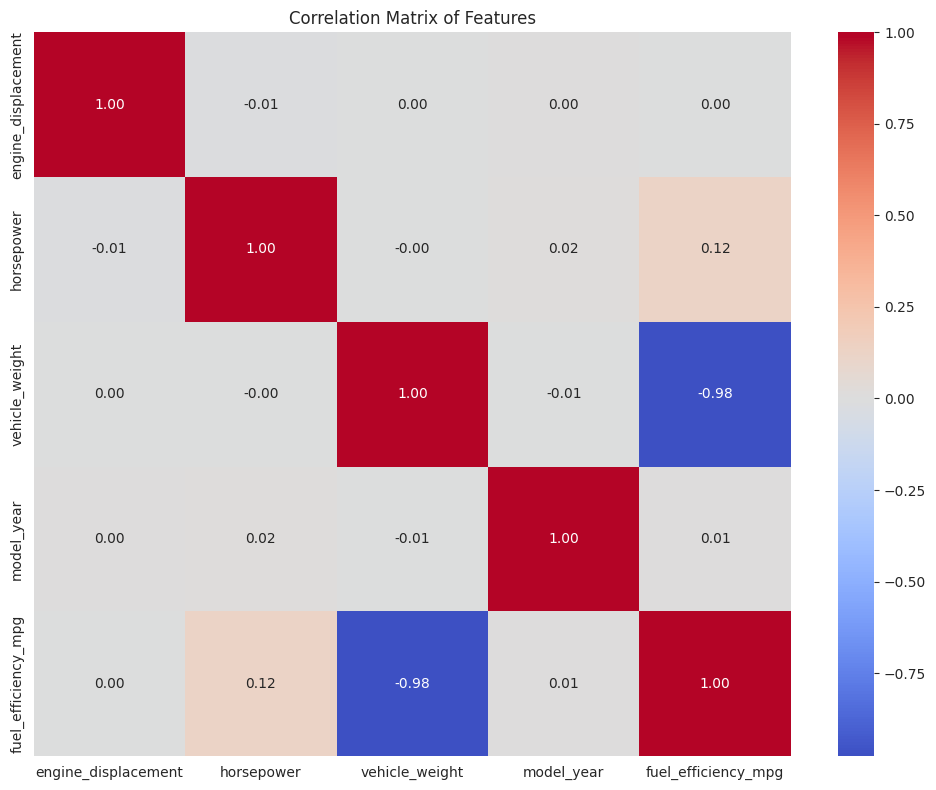


Correlation with target (fuel_efficiency_mpg):
fuel_efficiency_mpg    1.000000
horsepower             0.122041
model_year             0.008693
engine_displacement    0.001135
vehicle_weight        -0.976795
Name: fuel_efficiency_mpg, dtype: float64


In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_model.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

print("\nCorrelation with target (fuel_efficiency_mpg):")
print(correlation_matrix['fuel_efficiency_mpg'].sort_values(ascending=False))

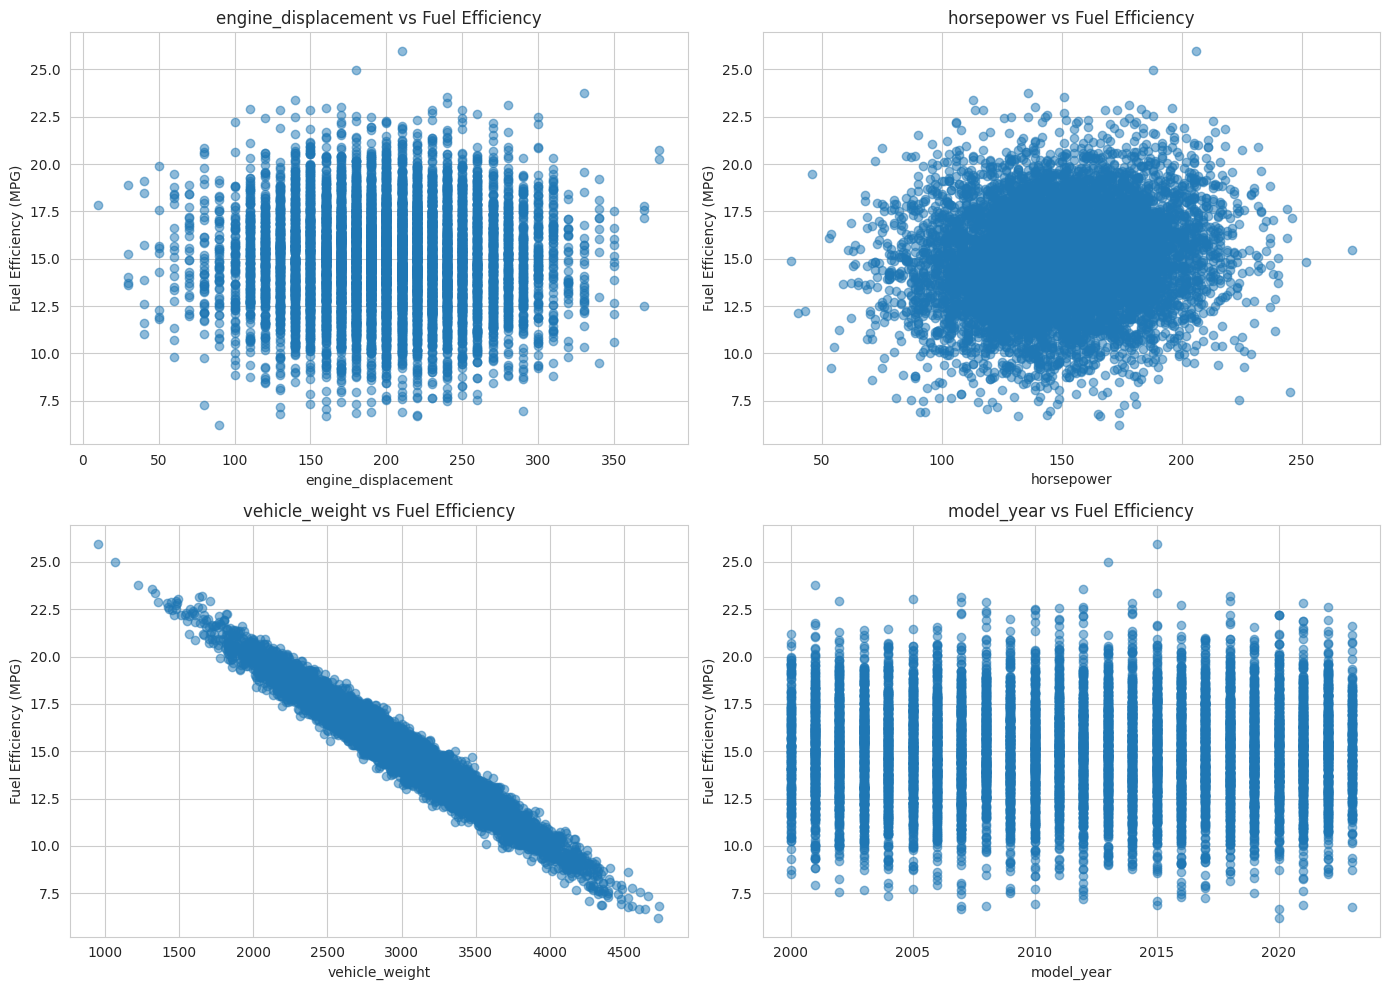

In [8]:
# Pairwise relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    axes[row, col].scatter(df_model[feature], df_model['fuel_efficiency_mpg'], alpha=0.5)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Fuel Efficiency (MPG)')
    axes[row, col].set_title(f'{feature} vs Fuel Efficiency')

plt.tight_layout()
plt.show()

## 4. Handle Missing Values

In [9]:
# Option 1: Drop rows with missing values
print(f"Rows before dropping missing values: {len(df_model)}")
df_clean = df_model.dropna()
print(f"Rows after dropping missing values: {len(df_clean)}")
print(f"Rows dropped: {len(df_model) - len(df_clean)} ({(len(df_model) - len(df_clean)) / len(df_model) * 100:.2f}%)")

# Verify no missing values remain
print(f"\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Rows before dropping missing values: 9704
Rows after dropping missing values: 8996
Rows dropped: 708 (7.30%)

Missing values after cleaning:
engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64


## 5. Split Data into Train/Validation/Test Sets

In [10]:
# Separate features and target
X = df_clean.drop('fuel_efficiency_mpg', axis=1)
y = df_clean['fuel_efficiency_mpg']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Features shape: (8996, 4)
Target shape: (8996,)

Features: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']


In [11]:
# Split: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 of 0.8 = 0.2

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df_clean)*100:.1f}%)")

Training set: 5397 samples (60.0%)
Validation set: 1799 samples (20.0%)
Test set: 1800 samples (20.0%)


## 6. Build and Train Regression Model

In [12]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"\nModel Intercept: {model.intercept_:.4f}")
print(f"\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")

Model trained successfully!

Model Intercept: 27.6235

Model Coefficients:
  engine_displacement: 0.0001
  horsepower: 0.0102
  vehicle_weight: -0.0050
  model_year: 0.0004


## 7. Evaluate Model Performance

In [13]:
# Make predictions on all sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate metrics for all sets
def calculate_metrics(y_true, y_pred, set_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{set_name} Set Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    return rmse, mae, r2

train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
val_metrics = calculate_metrics(y_val, y_val_pred, "Validation")
test_metrics = calculate_metrics(y_test, y_test_pred, "Test")


Training Set Metrics:
  RMSE: 0.4554
  MAE: 0.3630
  R² Score: 0.9687

Validation Set Metrics:
  RMSE: 0.4481
  MAE: 0.3564
  R² Score: 0.9694

Test Set Metrics:
  RMSE: 0.4591
  MAE: 0.3669
  R² Score: 0.9669


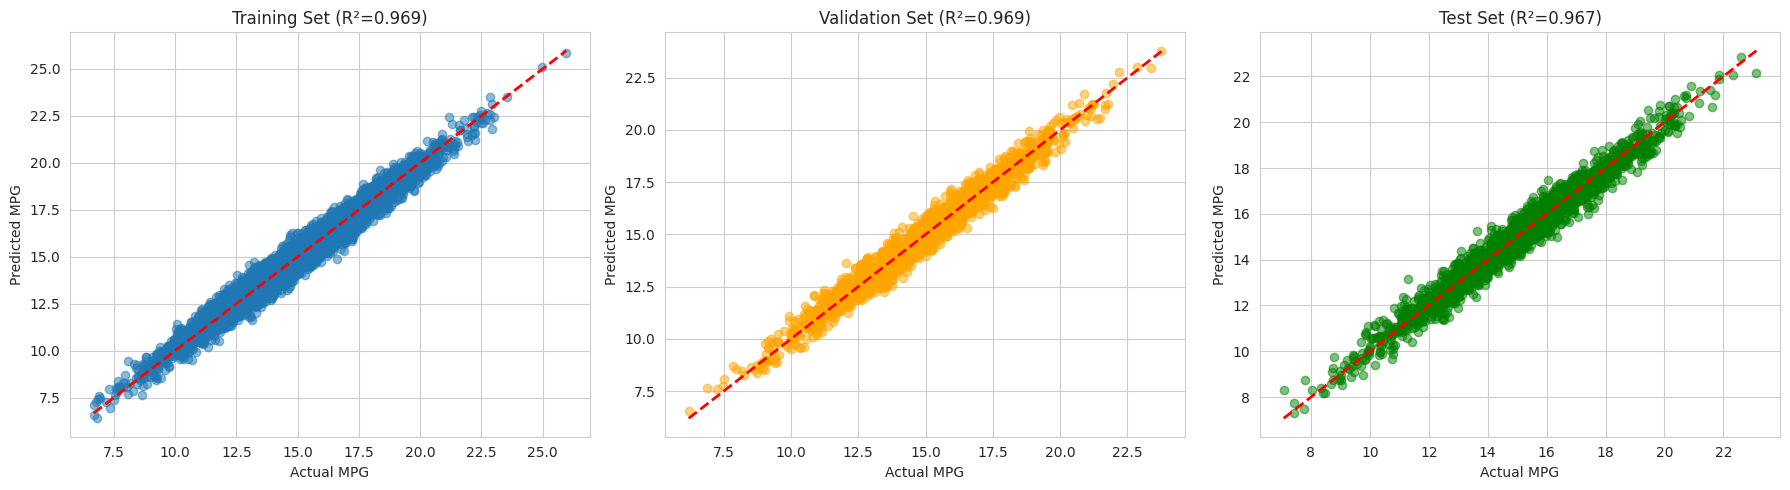

In [14]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual MPG')
axes[0].set_ylabel('Predicted MPG')
axes[0].set_title(f'Training Set (R²={train_metrics[2]:.3f})')
axes[0].grid(True)

# Validation set
axes[1].scatter(y_val, y_val_pred, alpha=0.5, color='orange')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual MPG')
axes[1].set_ylabel('Predicted MPG')
axes[1].set_title(f'Validation Set (R²={val_metrics[2]:.3f})')
axes[1].grid(True)

# Test set
axes[2].scatter(y_test, y_test_pred, alpha=0.5, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual MPG')
axes[2].set_ylabel('Predicted MPG')
axes[2].set_title(f'Test Set (R²={test_metrics[2]:.3f})')
axes[2].grid(True)

plt.tight_layout()
plt.show()

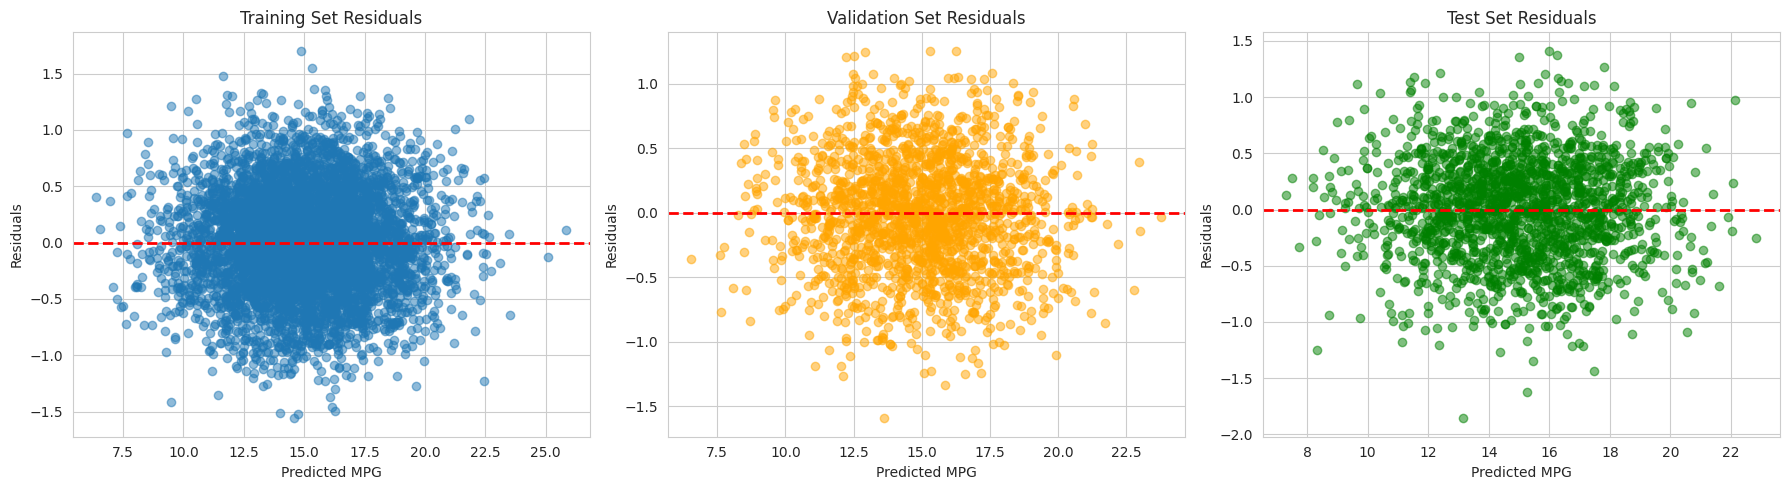

In [15]:
# Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training residuals
train_residuals = y_train - y_train_pred
axes[0].scatter(y_train_pred, train_residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted MPG')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Training Set Residuals')
axes[0].grid(True)

# Validation residuals
val_residuals = y_val - y_val_pred
axes[1].scatter(y_val_pred, val_residuals, alpha=0.5, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted MPG')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Validation Set Residuals')
axes[1].grid(True)

# Test residuals
test_residuals = y_test - y_test_pred
axes[2].scatter(y_test_pred, test_residuals, alpha=0.5, color='green')
axes[2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Predicted MPG')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Test Set Residuals')
axes[2].grid(True)

plt.tight_layout()
plt.show()


Feature Importance (by absolute coefficient):
               Feature  Coefficient  Abs_Coefficient
1           horsepower     0.010210         0.010210
2       vehicle_weight    -0.005026         0.005026
3           model_year     0.000448         0.000448
0  engine_displacement     0.000095         0.000095


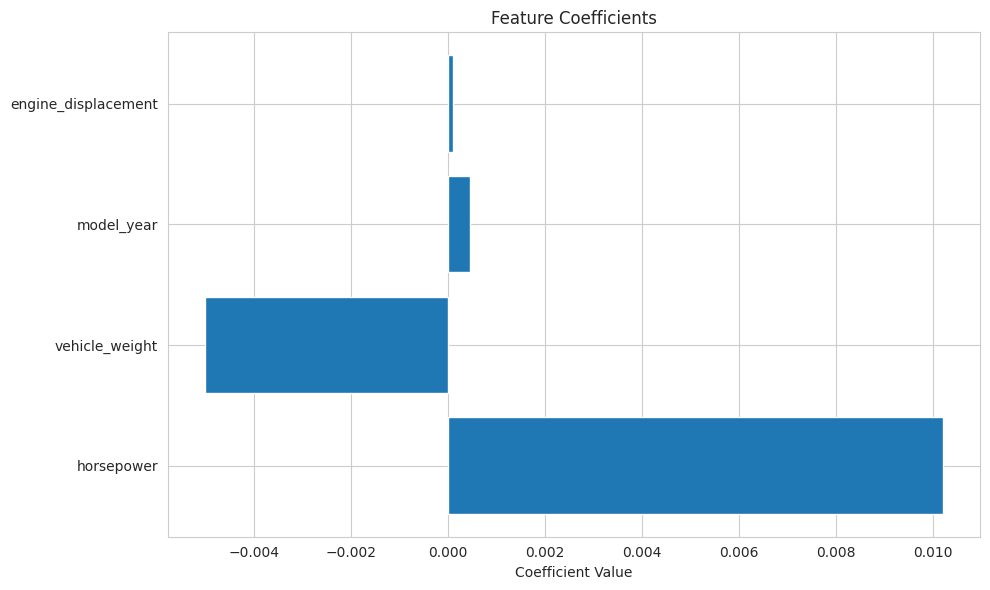

In [16]:
# Feature importance (based on absolute coefficient values)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (by absolute coefficient):")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## 8. Summary and Conclusions

In [17]:
print("="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"\nDataset: {len(df_clean)} samples used after cleaning")
print(f"Features: {list(X.columns)}")
print(f"Target: fuel_efficiency_mpg")
print(f"\nModel: Linear Regression")
print(f"\nPerformance Metrics:")
print(f"  Training   - RMSE: {train_metrics[0]:.4f}, MAE: {train_metrics[1]:.4f}, R²: {train_metrics[2]:.4f}")
print(f"  Validation - RMSE: {val_metrics[0]:.4f}, MAE: {val_metrics[1]:.4f}, R²: {val_metrics[2]:.4f}")
print(f"  Test       - RMSE: {test_metrics[0]:.4f}, MAE: {test_metrics[1]:.4f}, R²: {test_metrics[2]:.4f}")
print(f"\nKey Insights:")
print(f"  - The model explains approximately {test_metrics[2]*100:.1f}% of variance in fuel efficiency")
print(f"  - Average prediction error is about {test_metrics[1]:.2f} MPG")
print("="*60)

MODEL PERFORMANCE SUMMARY

Dataset: 8996 samples used after cleaning
Features: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
Target: fuel_efficiency_mpg

Model: Linear Regression

Performance Metrics:
  Training   - RMSE: 0.4554, MAE: 0.3630, R²: 0.9687
  Validation - RMSE: 0.4481, MAE: 0.3564, R²: 0.9694
  Test       - RMSE: 0.4591, MAE: 0.3669, R²: 0.9669

Key Insights:
  - The model explains approximately 96.7% of variance in fuel efficiency
  - Average prediction error is about 0.37 MPG


In [3]:
# Q2: What's the median (50% percentile) for variable 'horsepower'?
median_hp = df['horsepower'].median()
print(f"The median (50% percentile) for 'horsepower' is: {median_hp}")

The median (50% percentile) for 'horsepower' is: 149.0


In [ ]:
# Q3: Compare imputations for 'horsepower' and evaluate on validation set
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load filtered dataset (select same columns used earlier)
df = pd.read_csv('car_fuel_efficiency.csv')
cols = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df_model = df[cols].copy()
df_model['horsepower'] = pd.to_numeric(df_model['horsepower'], errors='coerce')

# Shuffle and split (60/20/20) with seed 42
df_model = df_model.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_model)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
train = df_model.iloc[:n_train].reset_index(drop=True)
val = df_model.iloc[n_train:n_train + n_val].reset_index(drop=True)

# Prepare X and y
X_train = train.drop('fuel_efficiency_mpg', axis=1).copy()
y_train = train['fuel_efficiency_mpg'].copy()
X_val = val.drop('fuel_efficiency_mpg', axis=1).copy()
y_val = val['fuel_efficiency_mpg'].copy()

# Ensure numeric
for c in ['engine_displacement','vehicle_weight','model_year']:
    X_train[c] = pd.to_numeric(X_train[c], errors='coerce')
    X_val[c] = pd.to_numeric(X_val[c], errors='coerce')

# Option 1: fill horsepower with 0
Xtr1 = X_train.copy()
Xva1 = X_val.copy()
Xtr1['horsepower'] = Xtr1['horsepower'].fillna(0)
Xva1['horsepower'] = Xva1['horsepower'].fillna(0)
model1 = LinearRegression()
model1.fit(Xtr1, y_train)
pred_val1 = model1.predict(Xva1)
rmse1 = math.sqrt(mean_squared_error(y_val, pred_val1))

# Option 2: fill horsepower with training mean
hp_mean = X_train['horsepower'].mean()
Xtr2 = X_train.copy()
Xva2 = X_val.copy()
Xtr2['horsepower'] = Xtr2['horsepower'].fillna(hp_mean)
Xva2['horsepower'] = Xva2['horsepower'].fillna(hp_mean)
model2 = LinearRegression()
model2.fit(Xtr2, y_train)
pred_val2 = model2.predict(Xva2)
rmse2 = math.sqrt(mean_squared_error(y_val, pred_val2))

print('RMSE (with 0):', round(rmse1, 2))
print('RMSE (with mean):', round(rmse2, 2))

if round(rmse1,2) < round(rmse2,2):
    print('Winner: With 0')
elif round(rmse2,2) < round(rmse1,2):
    print('Winner: With mean')
else:
    print('Winner: Both are equally good')

RMSE (with 0): 0.52
RMSE (with mean): 0.46
Winner: With mean


In [4]:
# Q4: Regularized linear regression with different r values

import numpy as np

# Fill NAs with 0
X_train_filled = X_train.fillna(0)
X_val_filled = X_val.fillna(0)

# Add bias term
X_train_with_bias = np.column_stack([np.ones(len(X_train_filled)), X_train_filled])
X_val_with_bias = np.column_stack([np.ones(len(X_val_filled)), X_val_filled])

# Test different r values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
results = []

for r in r_values:
    # Regularized linear regression: w = (X^T X + r*I)^(-1) X^T y
    XTX = X_train_with_bias.T @ X_train_with_bias
    identity = np.eye(XTX.shape[0])
    reg_term = r * identity
    
    w = np.linalg.inv(XTX + reg_term) @ X_train_with_bias.T @ y_train
    
    # Predict on validation set
    y_val_pred = X_val_with_bias @ w
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_val - y_val_pred) ** 2))
    
    results.append((r, round(rmse, 2)))
    print(f"r={r:6.2f} -> RMSE={rmse:.2f}")

# Find best r
best_r = min(results, key=lambda x: (x[1], x[0]))
print(f"\nBest r: {best_r[0]} (RMSE: {best_r[1]})")

r=  0.00 -> RMSE=0.52
r=  0.01 -> RMSE=0.52
r=  0.10 -> RMSE=0.52
r=  1.00 -> RMSE=0.52
r=  5.00 -> RMSE=0.52
r= 10.00 -> RMSE=0.52
r=100.00 -> RMSE=0.52

Best r: 0 (RMSE: 0.52)


In [7]:
# Q5: Evaluate model stability with different random seeds

import numpy as np
import pandas as pd

# List to store RMSE scores for each seed
rmse_scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
    # Split data with current seed (60%/20%/20%)
    np.random.seed(seed)
    
    # Assuming you have a dataframe 'df' with the data
    # First shuffle the data
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx].reset_index(drop=True)
    
    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train+n_val]
    df_test = df_shuffled.iloc[n_train+n_val:]
    
    # Separate features and target
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    
    # Remove target from features
    X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    X_val = df_val.drop('fuel_efficiency_mpg', axis=1)
    
    # Select only numeric columns for regression
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    X_train_filled = X_train[numeric_cols].fillna(0)
    X_val_filled = X_val[numeric_cols].fillna(0)
    
    # Add bias term
    X_train_with_bias = np.column_stack([np.ones(len(X_train_filled)), X_train_filled])
    X_val_with_bias = np.column_stack([np.ones(len(X_val_filled)), X_val_filled])
    
    # Train model without regularization (r=0)
    XTX = X_train_with_bias.T @ X_train_with_bias
    w = np.linalg.inv(XTX) @ X_train_with_bias.T @ y_train
    
    # Predict on validation set
    y_val_pred = X_val_with_bias @ w
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_val - y_val_pred) ** 2))
    rmse_scores.append(rmse)
    
    print(f"Seed={seed} -> RMSE={rmse:.2f}")

# Calculate standard deviation
std = np.std(rmse_scores)
print(f"\nRMSE scores: {[round(score, 2) for score in rmse_scores]}")
print(f"Standard deviation: {round(std, 3)}")

Seed=0 -> RMSE=0.51
Seed=1 -> RMSE=0.51
Seed=2 -> RMSE=0.51
Seed=3 -> RMSE=0.51
Seed=4 -> RMSE=0.50
Seed=5 -> RMSE=0.52
Seed=6 -> RMSE=0.52
Seed=7 -> RMSE=0.50
Seed=8 -> RMSE=0.50
Seed=9 -> RMSE=0.50

RMSE scores: [np.float64(0.51), np.float64(0.51), np.float64(0.51), np.float64(0.51), np.float64(0.5), np.float64(0.52), np.float64(0.52), np.float64(0.5), np.float64(0.5), np.float64(0.5)]
Standard deviation: 0.007


In [10]:
# Q6: Final evaluation on test dataset with r=0.001

import numpy as np

# Split data with seed 9 (60%/20%/20%)
np.random.seed(9)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx].reset_index(drop=True)

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

# Separate features and target
y_train_val = df_train_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

X_train_val = df_train_val.drop('fuel_efficiency_mpg', axis=1)
X_test = df_test.drop('fuel_efficiency_mpg', axis=1)

# Fill NAs with 0
X_train_val_filled = X_train_val.fillna(0)
X_test_filled = X_test.fillna(0)

# Select only numeric columns for regression
numeric_cols = X_train_val_filled.select_dtypes(include=[np.number]).columns
X_train_val_numeric = X_train_val_filled[numeric_cols]
X_test_numeric = X_test_filled[numeric_cols]

# Add bias term
X_train_val_with_bias = np.column_stack([np.ones(len(X_train_val_numeric)), X_train_val_numeric])
X_test_with_bias = np.column_stack([np.ones(len(X_test_numeric)), X_test_numeric])

# Train model with r=0.001
r = 0.001
XTX = X_train_val_with_bias.T @ X_train_val_with_bias
identity = np.eye(XTX.shape[0])
reg_term = r * identity

w = np.linalg.inv(XTX + reg_term) @ X_train_val_with_bias.T @ y_train_val

# Predict on test set
y_test_pred = X_test_with_bias @ w

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

print(f"RMSE on test dataset: {rmse:.2f}")
print(f"RMSE rounded to 2 decimals: {round(rmse, 2)}")

RMSE on test dataset: 0.50
RMSE rounded to 2 decimals: 0.5
